In [22]:
# EJERCICIO DEL ARCHIVO FVE.MAT
# muestra el heatmap de la matriz de activación 

import scipy.io
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns


In [26]:
mat_path2 = r"fve32.mat"
mat_data = scipy.io.loadmat('fve32.mat')

In [30]:
print(mat_data.keys())  

dict_keys(['__header__', '__version__', '__globals__', 'Names', 'CIJ'])


In [36]:
activation_matrix = mat_data['CIJ']

In [38]:
print(activation_matrix.shape)

(32, 32)


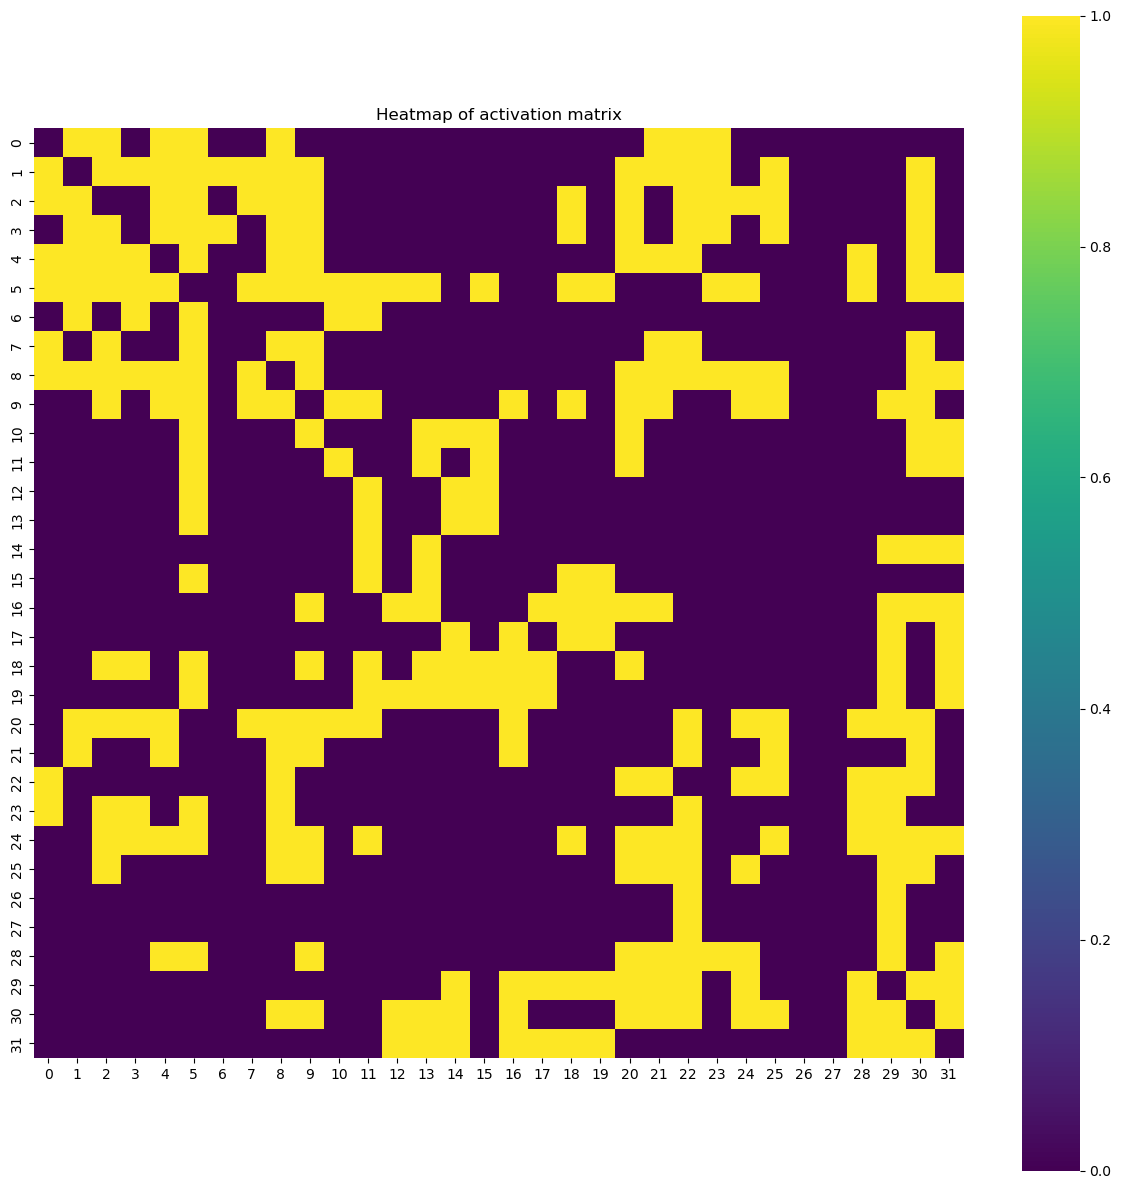

In [82]:
plt.figure(figsize=(15, 15))
sns.heatmap(activation_matrix, cmap='viridis', cbar=True, square=True)
plt.title("Heatmap of activation matrix")
plt.show()

In [50]:
# Usando los nombres del archivo.mat, muestra el grafo en 4 formas distintas
import networkx as nx

In [54]:
G = nx.from_numpy_array(activation_matrix)

In [58]:
node_names = mat_data['Names'].flatten()
G = nx.relabel_nodes(G, {i: name for i, name in enumerate(node_names)})

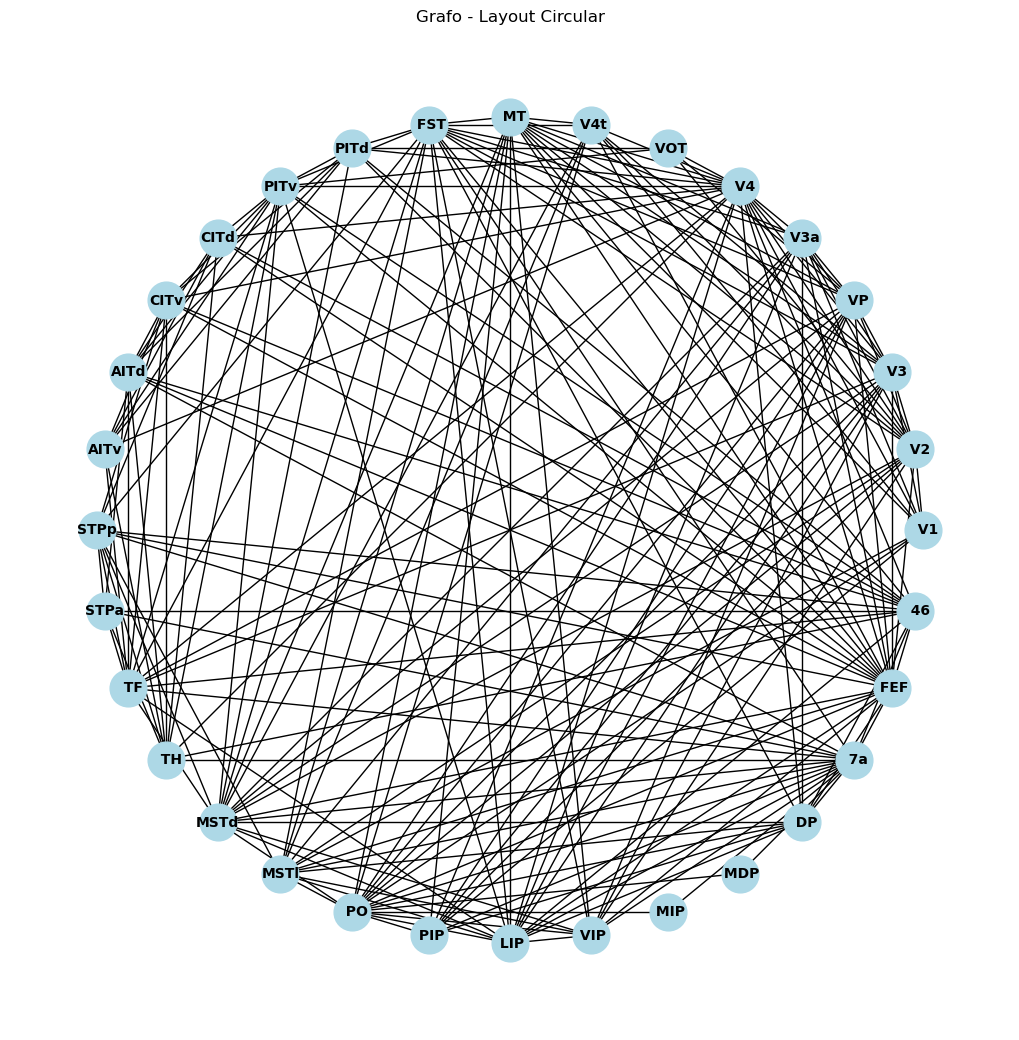

In [60]:
# 1. Layout Circular
plt.figure(figsize=(10, 10))
pos_circular = nx.circular_layout(G)
nx.draw(G, pos=pos_circular, with_labels=True, node_size=700, node_color='lightblue', font_size=10, font_color='black', font_weight='bold')
plt.title("Grafo - Layout Circular")
plt.show()

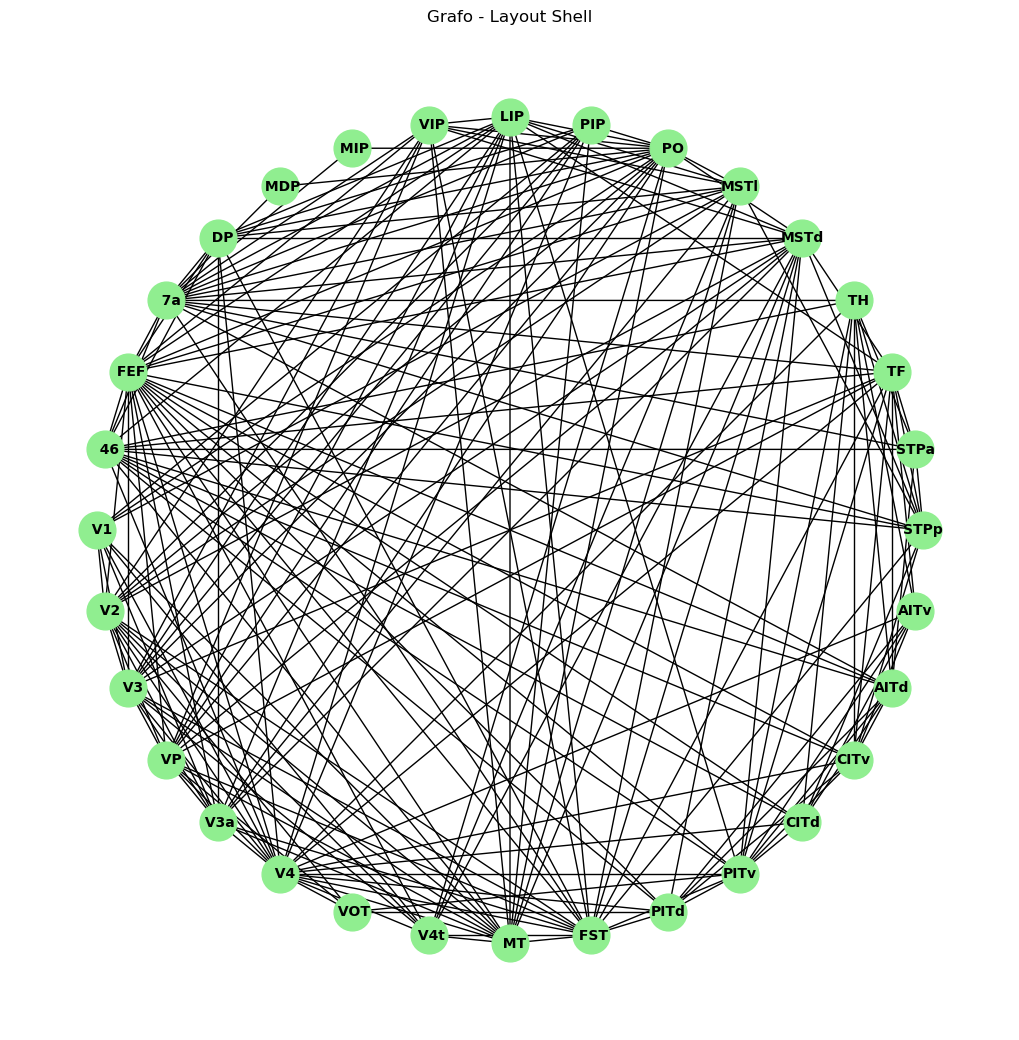

In [62]:
# 2. Layout Shell
plt.figure(figsize=(10, 10))
pos_shell = nx.shell_layout(G)
nx.draw(G, pos=pos_shell, with_labels=True, node_size=700, node_color='lightgreen', font_size=10, font_color='black', font_weight='bold')
plt.title("Grafo - Layout Shell")
plt.show()


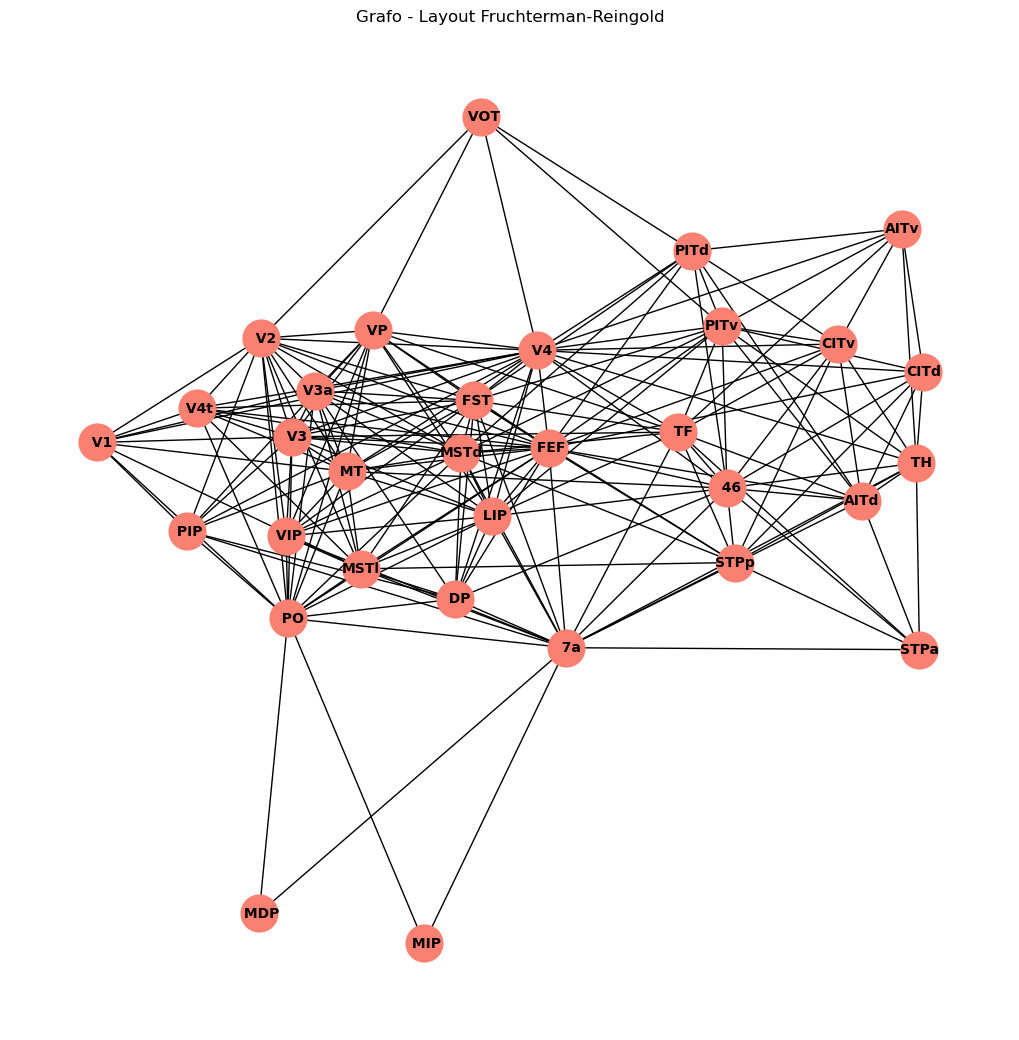

In [64]:
# 3. Layout Fruchterman-Reingold
plt.figure(figsize=(10, 10))
pos_fruchterman = nx.spring_layout(G)  
nx.draw(G, pos=pos_fruchterman, with_labels=True, node_size=700, node_color='salmon', font_size=10, font_color='black', font_weight='bold')
plt.title("Grafo - Layout Fruchterman-Reingold")
plt.show()

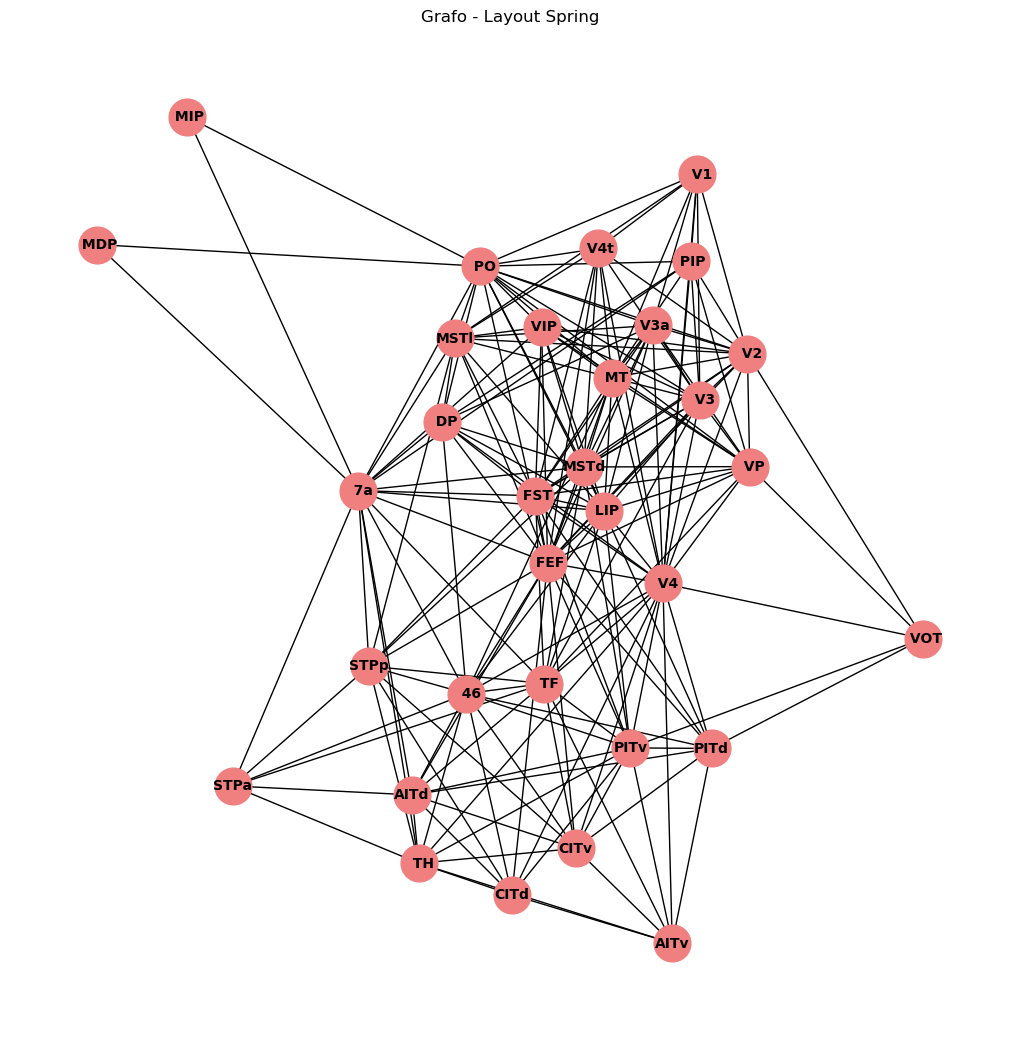

In [68]:
# 4. Layout Spring 
plt.figure(figsize=(10, 10))
pos_spring = nx.spring_layout(G) 
nx.draw(G, pos=pos_spring, with_labels=True, node_size=700, node_color='lightcoral', font_size=10, font_color='black', font_weight='bold')
plt.title("Grafo - Layout Spring")
plt.show()

In [70]:
# determina el nodo con mayor número de conexiones 
degree_dict = dict(G.degree())

In [72]:
max_degree_node = max(degree_dict, key=degree_dict.get)
max_degree = degree_dict[max_degree_node]

In [74]:
print(f'El nodo con más conexiones es: {max_degree_node} con {max_degree} conexiones.')

El nodo con más conexiones es:  FEF con 22 conexiones.


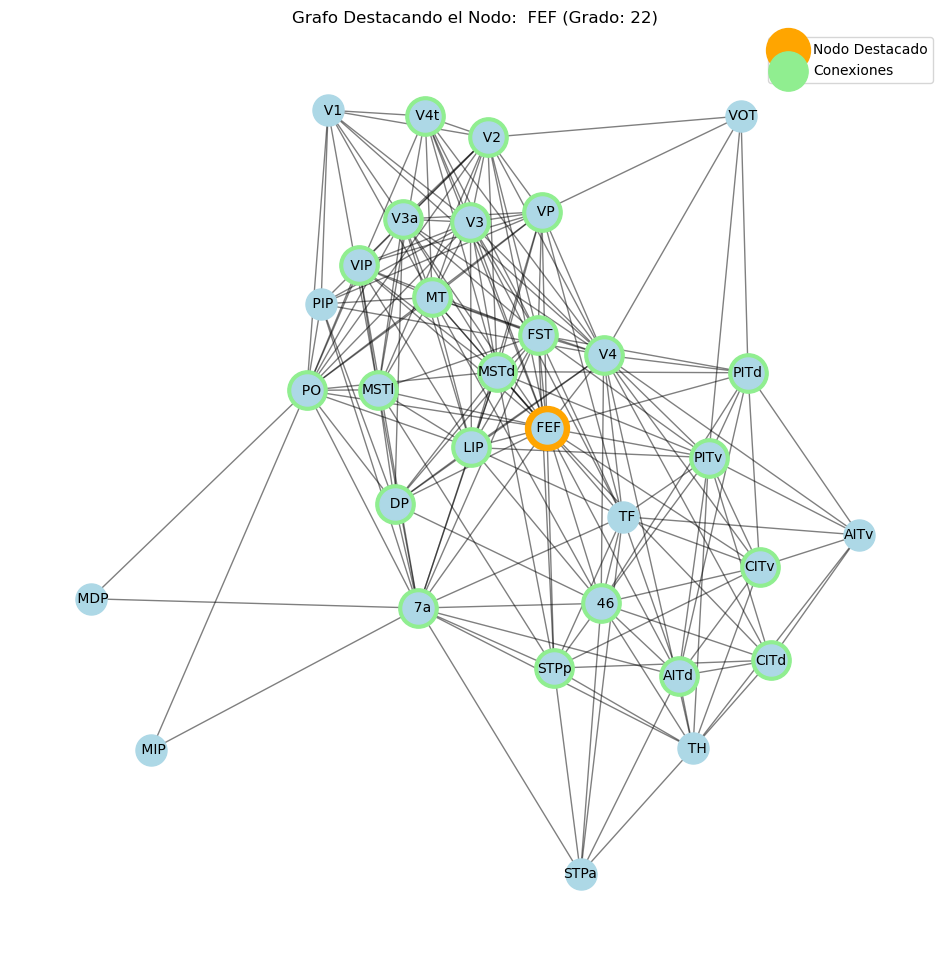

In [80]:
# Muestra el grado solo destacando las conexiones del nodo encontrado en el ejercicio anterior. 
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_nodes(G, pos, nodelist=[max_degree_node], node_color='orange', node_size=1000, label='Nodo Destacado')
nx.draw_networkx_nodes(G, pos, nodelist=list(G.neighbors(max_degree_node)), node_color='lightgreen', node_size=800, label='Conexiones')
nx.draw_networkx_nodes(G, pos, nodelist=list(G.nodes()), node_color='lightblue', node_size=500)
nx.draw_networkx_labels(G, pos, font_size=10)
plt.legend()
plt.title(f'Grafo Destacando el Nodo: {max_degree_node} (Grado: {max_degree})')
plt.axis('off')  # Ocultar los ejes
plt.show()